In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


import warnings
import statsmodels.tsa.api as smt
from scipy.stats import kstest
import scipy

from sklearn import metrics
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from scipy.stats import gaussian_kde
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Activation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,LeakyReLU,Dropout
import tensorflow as tf


pd.set_option("display.max_column",30)
pd.set_option("display.max_rows",100)
warnings.filterwarnings("ignore")

import yfinance as yf #pip install yfinance
import tensorflow as tf

In [38]:
df=yf.download ("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [39]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-03-22,57517.890625,58471.480469,54288.156250,54529.144531,54529.144531,56521454974
2021-03-23,54511.660156,55985.441406,53470.695312,54738.945312,54738.945312,56435023914
2021-03-24,54710.488281,57262.382812,52514.332031,52774.265625,52774.265625,70567223787


In [40]:
df.copy()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-03-22,57517.890625,58471.480469,54288.156250,54529.144531,54529.144531,56521454974
2021-03-23,54511.660156,55985.441406,53470.695312,54738.945312,54738.945312,56435023914
2021-03-24,54710.488281,57262.382812,52514.332031,52774.265625,52774.265625,70567223787


In [41]:
df.reset_index(inplace=True)

In [42]:
df1=df.copy()

In [43]:
data=df1.copy()

In [125]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [126]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

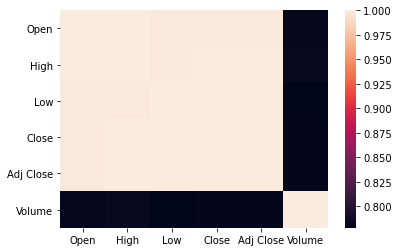

In [127]:
sns.heatmap(df.corr())

In [128]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999292,0.998847,0.998490,0.998490,0.781123
High,0.999292,1.000000,0.998772,0.999398,0.999398,0.782779
Low,0.998847,0.998772,1.000000,0.999159,0.999159,0.777974
Close,0.998490,0.999398,0.999159,1.000000,1.000000,0.780480
Adj Close,0.998490,0.999398,0.999159,1.000000,1.000000,0.780480
Volume,0.781123,0.782779,0.777974,0.780480,0.780480,1.000000


In [129]:
#data pre-processing

# Select features (columns) to be involved intro training and predictions
cols = list(['Open','High', 'Low', 'Close'])

y_target='Close'   #select target variable

#number of time steps use to predict the future
time_steps=24

#extract the data as a list
df_date=list(df['Date'])

# Parse training set timestamp for better visualization
data = pd.DataFrame(df, columns=cols)
data.index = df_date
data.index = pd.to_datetime(data.index)

In [130]:
print('Training set shape == {}'.format(data.shape))
print('All timestamps == {}'.format(len(df_date)))
print('Featured selected: {}'.format(cols))
print('Featured target selected: {}'.format(y_target))
print('Number of time steps selected: {}'.format(time_steps))

Training set shape == (2378, 4)
All timestamps == 2378
Featured selected: ['Open', 'High', 'Low', 'Close']
Featured target selected: Close
Number of time steps selected: 24


In [131]:
data


,Open,High,Low,Close
2014-09-17,465.864014,468.174011,452.421997,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
2021-03-21,58309.914062,58767.898438,56005.617188,57523.421875
2021-03-22,57517.890625,58471.480469,54288.156250,54529.144531
2021-03-23,54511.660156,55985.441406,53470.695312,54738.945312
2021-03-24,54710.488281,57262.382812,52514.332031,52774.265625


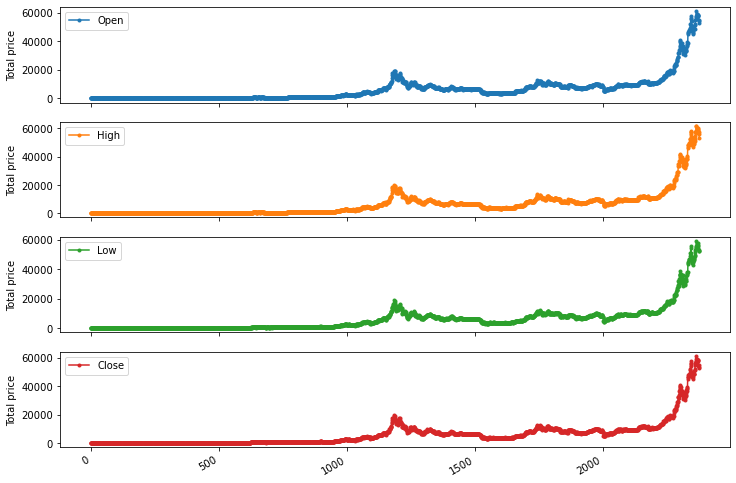

In [81]:
#monthly total stock values
cols_plot = ["Open","High","Low","Close"]
axes = df[cols_plot].plot(marker='.', alpha=1, figsize=(12,9), subplots=True)
for ax in axes:
    ax.set_ylabel('Total price')


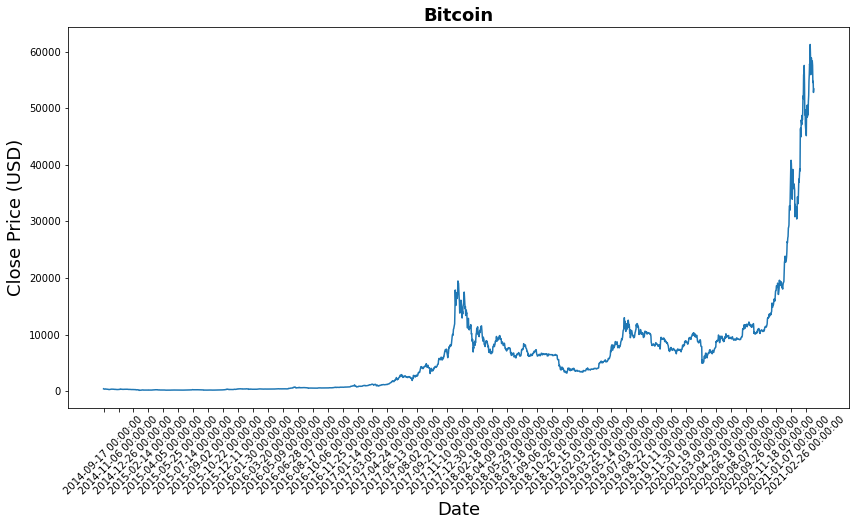

In [82]:
price=df['Close']

plt.figure(figsize = (14,7))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=45)
plt.title("Bitcoin",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

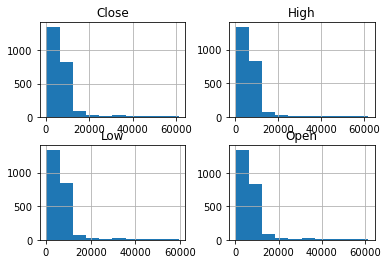

In [83]:
data.hist()
plt.show()

In [84]:
np.cumsum(df['Close'])

0       4.573340e+02
1       8.817740e+02
2       1.276570e+03
3       1.685474e+03
4       2.084295e+03
            ...     
2373    1.481989e+07
2374    1.487442e+07
2375    1.492916e+07
2376    1.498193e+07
2377    1.503532e+07
Name: Close, Length: 2378, dtype: float64

In [32]:
import math

from sklearn.preprocessing import StandardScaler

In [134]:
train_split = 0.8
Data = data.values #converting numpy array
train_data_size = math.ceil(len(Data)*train_split)
test_data_size = len(data) - train_data_size


# split the actual dataframe in train/test set
train, test = data[0:train_data_size], data[train_data_size:len(data)]
print('train shape == {}.'.format(train.shape))
print('test shape == {}.'.format(test.shape))

train shape == (1903, 4).
test shape == (475, 4).


In [135]:
x_train=tf.keras.utils.normalize(train,axis=1)#scale data between 0 to 1
x_test=tf.keras.utils.normalize(test,axis=1)

In [136]:
scaler = StandardScaler()
training_scaled_data = scaler.fit_transform(train)
print('training scaled data shape == {}.'.format(training_scaled_data.shape))

look_back_train_data = train.tail(time_steps) #look back n_time_steps
testing_data = look_back_train_data.append(test)

testing_scaled_data = scaler.fit_transform(testing_data)

scaler.fit_transform(testing_data.iloc[:, 0:1])
print('testing scaled data shape == {}.'.format(testing_scaled_data.shape))


training scaled data shape == (1903, 4).
testing scaled data shape == (499, 4).


In [137]:
#convert an array of data in matrix
def create(dataset,n_timesteps):
    dataX,dataY=[],[]
    for i in range(len(dataset)-n_timesteps-1):
        a=dataset[i:(i+n_timesteps),0]
        dataX.append(a)
        dataY.append(dataset[i+n_timesteps,0])
    return np.array(dataX) , np.array(dataY)

In [138]:
def multivariate_output(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
      # find the end of this pattern
        end_ix = (i + n_steps)
      # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
      # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
# convert into input/output
X_train, y_train = multivariate_output(training_scaled_data,time_steps)
X_test, y_test = multivariate_output(testing_scaled_data,time_steps)

In [139]:
print('X_train shape == {}'.format(X_train.shape))
print('y_train shape == {}'.format(y_train.shape))
print('X_test shape == {}'.format(X_test.shape))
print('y_test shape == {}'.format(y_test.shape))

X_train shape == (1879, 24, 4)
y_train shape == (1879, 4)
X_test shape == (475, 24, 4)
y_test shape == (475, 4)


#reshape
x_train,y_train=create(training_scaled_data,time_steps)
x_test,y_test=create(testing_scaled_data,time_steps)



print('x_train shape == {}'.format(x_train.shape))
print('y_train shape == {}'.format(y_train.shape))
print('x_test shape == {}'.format(x_test.shape))
print('y_test shape == {}.'.format(y_test.shape))



In [140]:
#Build LSTM network
#The model is the formed with two LSTM hidden layers, each with 50 units.
#25% dropout layers are also used between each LSTM hidden layer.
#Linear activation is then used on the Dense output layer.




# Initializing the Neural Network based on LSTM
model = Sequential()  
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.25))
model.add(LSTM(units=50))
model.add(Dropout(0.25))
model.add(Dense(units=X_train.shape[2], activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error')
  


In [141]:
history = model.fit(X_train, y_train, shuffle=False, validation_data=(X_test, y_test),
                    epochs=30, verbose=2, batch_size=256)
  

Epoch 1/30
8/8 - 5s - loss: 0.7999 - val_loss: 0.5343
Epoch 2/30
8/8 - 1s - loss: 0.2596 - val_loss: 0.2626
Epoch 3/30
8/8 - 1s - loss: 0.1827 - val_loss: 0.1685
Epoch 4/30
8/8 - 1s - loss: 0.1525 - val_loss: 0.1417
Epoch 5/30
8/8 - 1s - loss: 0.1258 - val_loss: 0.1366
Epoch 6/30
8/8 - 1s - loss: 0.1142 - val_loss: 0.1147
Epoch 7/30
8/8 - 1s - loss: 0.0966 - val_loss: 0.0882
Epoch 8/30
8/8 - 1s - loss: 0.0867 - val_loss: 0.0753
Epoch 9/30
8/8 - 1s - loss: 0.0739 - val_loss: 0.0622
Epoch 10/30
8/8 - 1s - loss: 0.0717 - val_loss: 0.0485
Epoch 11/30
8/8 - 1s - loss: 0.0640 - val_loss: 0.0419
Epoch 12/30
8/8 - 1s - loss: 0.0610 - val_loss: 0.0394
Epoch 13/30
8/8 - 1s - loss: 0.0635 - val_loss: 0.0292
Epoch 14/30
8/8 - 1s - loss: 0.0596 - val_loss: 0.0366
Epoch 15/30
8/8 - 1s - loss: 0.0688 - val_loss: 0.0259
Epoch 16/30
8/8 - 1s - loss: 0.0779 - val_loss: 0.0391
Epoch 17/30
8/8 - 1s - loss: 0.1075 - val_loss: 0.0676
Epoch 18/30
8/8 - 1s - loss: 0.0617 - val_loss: 0.0304
Epoch 19/30
8/8 - 1

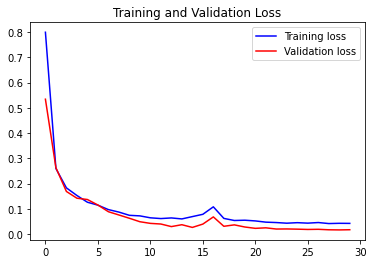

In [142]:
loss =history.history['loss']
val_loss =history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

In [143]:
# Perform predictions
trainPredict = model.predict(X_train, batch_size=256)
testpredict=model.predict(X_test ,batch_size=256)


# Inverse the predictions to original measurements
y_pred_test = scaler.inverse_transform(np.array(testpredict))
y_actual_test = scaler.inverse_transform(np.array(y_test))

y_pred_train= scaler.inverse_transform(np.array(trainPredict))
y_actual_train = scaler.inverse_transform(np.array(y_train))



In [144]:
trainScore = math.sqrt(mean_squared_error(y_actual_train, trainPredict))
print('Test Score: %.f RMSE' % (trainScore))

Test Score: 21388 RMSE


In [145]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
 
def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100
 
 #  transfer 
print(mape(y_actual_train,trainPredict))
print(smape(y_actual_train,trainPredict))

100.00670910529452
199.99510815203067


In [146]:
mean_absolute_error(y_actual_train,trainPredict)

16428.998344283205

In [147]:
#SVM


In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
df1=df1[['Date','Close']]

In [9]:
df1=df1.drop('Date',axis=1)

In [10]:
df1

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014
...,...
2374,54529.144531
2375,54738.945312
2376,52774.265625
2377,51704.160156


In [11]:
prediction_days=30 # variable for prediction of 30 days in future

In [12]:
df1['prediction']=df1[['Close']].shift(-prediction_days)

In [13]:
df1.head()

,Close,prediction
0,457.334015,383.757996
1,424.440002,391.441986
2,394.795990,389.545990
3,408.903992,382.845001
4,398.821014,386.475006


In [14]:
df1.tail()

,Close,prediction
2374,54529.144531,NaN
2375,54738.945312,NaN
2376,52774.265625,NaN
2377,51704.160156,NaN
2378,53757.910156,NaN


In [15]:
x=np.array(df1.drop(['prediction'],1))                                           #create independent data set for spliting

In [16]:
x=x[:len(df1)-prediction_days]
print(x)

[[  457.33401489]
 [  424.44000244]
 [  394.79598999]
 ...
 [54207.3203125 ]
 [48824.42578125]
 [49705.33203125]]


In [17]:
y=np.array(df1['prediction'])                                                            #create dependent variable for spliting 


In [18]:
y=y[:-prediction_days]
print(y)

[  383.75799561   391.44198608   389.54598999 ... 52774.265625
 51704.16015625 53757.91015625]


In [19]:
from sklearn.preprocessing import StandardScaler

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 

In [24]:
pred_days_array=np.array(df1.drop(['prediction'],1))[-prediction_days:]
print(pred_days_array)

[[47093.8515625 ]
 [46339.76171875]
 [46188.453125  ]
 [45137.76953125]
 [49631.2421875 ]
 [48378.98828125]
 [50538.2421875 ]
 [48561.16796875]
 [48927.3046875 ]
 [48912.3828125 ]
 [51206.69140625]
 [52246.5234375 ]
 [54824.1171875 ]
 [56008.55078125]
 [57805.12109375]
 [57332.08984375]
 [61243.0859375 ]
 [59302.31640625]
 [55907.19921875]
 [56804.90234375]
 [58870.89453125]
 [57858.921875  ]
 [58346.65234375]
 [58313.64453125]
 [57523.421875  ]
 [54529.14453125]
 [54738.9453125 ]
 [52774.265625  ]
 [51704.16015625]
 [53757.91015625]]


In [25]:
from sklearn.svm import SVR

In [26]:
svr_rbf=SVR(kernel='rbf', C=1e3,gamma=0.00001)                                   # create and train suport vector machine
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [27]:
svr_rbf_confident=svr_rbf.score(x_test,y_test)
print("svr accuracy",svr_rbf_confident)                                        #test the accuracy of 52%

svr accuracy 0.43136935290530753


In [28]:
pred=svr_rbf.predict(x_test)


In [29]:
pred

array([ 3946.95117751,   903.20814552,  3737.15456467, 11340.53124547,
         280.97733028,  4337.17048073,   235.10113713,   279.73626437,
        2744.27876744,  9009.87888362,  3953.37035162,   230.23669585,
        4030.84852612,  9966.63776117,  1105.5140068 ,  6224.80426495,
        8855.27373255,  9759.96330353,  1070.63231709,  8946.44011799,
        1764.41663859,   723.83178566,   240.45724966, 11072.4181048 ,
        6728.59188481,  9541.24470346,  6287.77106987,  3156.84976209,
       12340.71784284, 14551.72342524,   245.98689479,   763.18048244,
         335.76081096,  2745.50002912,  9187.67057281,   231.23891888,
         481.50284842,  7238.48232683,  3948.21312876,   638.6767307 ,
        2747.41950583,  7375.55220311, 10842.52363142,   375.07901956,
        6764.16166001,   448.36334327,   443.3279932 ,  7380.01591259,
         600.64522787,   378.38424964,   403.6453589 ,   229.97257978,
        1433.92298122,  8711.15230447,   484.73937489,   444.5335601 ,
      

In [30]:
svr_prediction=svr_rbf.predict(pred_days_array)
print(svr_prediction)                                                   # print the bitcoin prediction for next 30 days 

[11949.27575085 11581.57008728 11763.93900647 11381.80749987
 11866.72652628 11194.57971648 10765.3287406  11579.26446733
 11885.81083115 11887.28044289 10764.49712678 11673.64631999
 10786.64304194 12549.95438386 11259.3656327  11413.54226504
 10764.35792708 10764.35792708 12451.55267138 10775.98936848
 10764.35794734 11125.86977115 10765.84974124 10766.87136239
 11761.63141249 11119.3328077  10823.59425918 10784.40898704
 10902.57990192 10897.05387346]


In [33]:
trainScore = math.sqrt(mean_squared_error(y_test, pred))
print('Test Score: %.f RMSE' % (trainScore))

Test Score: 6976 RMSE


In [34]:
import yfinance as yf #pip install yfinance==>yfinance library which is going to extract our bitcoin prices from the yahoo finance api
import pandas as pd #manipulate the data
import numpy as np #manipulate the data
import matplotlib.pyplot as plt #visualization 
import tensorflow as tf # deep learning library
import math
from pandas.plotting import lag_plot

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,LeakyReLU,Dropout,Activation
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [44]:
df=data[['Date','Close']]

In [45]:
df['Close']=(df['Close']-df['Close'].mean())/df['Close'].std()


In [46]:
df['Close']

0      -0.658790
1      -0.662473
2      -0.665792
3      -0.664212
4      -0.665341
          ...   
2374    5.394663
2375    5.418151
2376    5.198201
2377    5.078400
2378    5.308693
Name: Close, Length: 2379, dtype: float64

In [47]:
np.cumsum(df['Close'])

0      -6.587904e-01
1      -1.321263e+00
2      -1.987055e+00
3      -2.651267e+00
4      -3.316608e+00
            ...     
2374   -2.100345e+01
2375   -1.558529e+01
2376   -1.038709e+01
2377   -5.308693e+00
2378    1.007194e-12
Name: Close, Length: 2379, dtype: float64

In [48]:
x_train ,x_val=train_test_split(df['Close'] ,test_size=0.2,shuffle=False)
x_val ,x_test=train_test_split(x_val ,test_size=0.4,shuffle=False)



In [49]:
x_train

0      -0.658790
1      -0.662473
2      -0.665792
3      -0.664212
4      -0.665341
          ...   
1898    0.125521
1899    0.158898
1900    0.137446
1901    0.121175
1902    0.109722
Name: Close, Length: 1903, dtype: float64

In [50]:
x_val

1903    0.109516
1904    0.101891
1905    0.123864
1906    0.134912
1907    0.135947
          ...   
2183    0.436663
2184    0.450185
2185    0.454415
2186    0.459033
2187    0.445776
Name: Close, Length: 285, dtype: float64

In [51]:
x_test

2188    0.485753
2189    0.498752
2190    0.518674
2191    0.515773
2192    0.515280
          ...   
2374    5.394663
2375    5.418151
2376    5.198201
2377    5.078400
2378    5.308693
Name: Close, Length: 191, dtype: float64

In [52]:
window_size=15 #sequences of 15
batch_size=32 #passing 32 sequences in

def win_ds(series , window_size ,batch_size ,shuffle):
    ds=tf.data.Dataset.from_tensor_slices(series) #transform the series into dataset
    ds=ds.window(window_size + 1 ,shift=1 , drop_remainder=True)#to build a method from tensorflow object,
                                                                #window_size+1==>inorder to create a output
                                                                #shift ==>we are going to aggregate the element
    ds=ds.flat_map(lambda w:w.batch(window_size +1)) #it is in nested to make this list we have using map function 
    ds=ds.shuffle(shuffle).map(lambda w :(w[:-1],w[-1]))
    ds=ds.batch(batch_size).prefetch(1)
    return ds

In [53]:
data=win_ds(x_train ,window_size ,batch_size,x_train.shape[0])
data

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>

In [54]:
#what is inside the dataset
for i in data:
    print(i)

(<tf.Tensor: shape=(32, 15), dtype=float64, numpy=
array([[-0.66098313, -0.66288766, -0.66241533, -0.66246134, -0.66160961,
        -0.66156853, -0.66145825, -0.66098884, -0.66127701, -0.66252348,
        -0.66278522, -0.66398445, -0.66514528, -0.66434628, -0.66360583],
       [-0.5937176 , -0.60503259, -0.60108528, -0.60176304, -0.59291377,
        -0.59275928, -0.5935631 , -0.59507892, -0.59000078, -0.58902568,
        -0.58659967, -0.58193798, -0.58312021, -0.58406844, -0.57758641],
       [-0.07090902, -0.03699535, -0.03473952, -0.03733459, -0.04607806,
        -0.09127086, -0.06617571, -0.04893169, -0.06280594, -0.06591933,
        -0.02105337, -0.02366413,  0.01416114,  0.04762477,  0.08246314],
       [ 0.00520946,  0.00216658,  0.00383132,  0.00870463,  0.0133338 ,
         0.02107309,  0.01251772,  0.00489377,  0.00753585,  0.00776533,
         0.00328725,  0.00196848, -0.06756948, -0.07768103, -0.08579532],
       [ 0.57082071,  0.60951132,  0.55466604,  0.42143176,  0.434283

In [55]:
x_train_data=win_ds(x_train ,window_size ,batch_size,x_train.shape[0])
x_val_data=win_ds(x_val ,window_size ,batch_size,x_val.shape[0])

In [56]:
input_layer=tf.keras.layers.Input(shape=[window_size])
l0=tf.keras.layers.Dense(128,activation ='relu')(input_layer)
l1=tf.keras.layers.Dense(256,activation='relu')(l0)
output_layers=tf.keras.layers.Dense(1)(l1)
  
model=tf.keras.models.Model(inputs=input_layer,outputs=output_layers)

In [57]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(optimizer='RMSprop',
             loss='mse',
             metrics ='mse')

In [59]:
history=model.fit(x_train_data,validation_data=x_val_data,epochs=100)

Epoch 1/100
59/59 [==============================] - 5s 34ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2/100
59/59 [==============================] - 1s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 3/100
59/59 [==============================] - 1s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 4/100
59/59 [==============================] - 1s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 5/100
59/59 [==============================] - 1s 6ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 6/100
59/59 [==============================] - 1s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/100
59/59 [==============================] - 1s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 8/100
59/59 [==============================] - 1s 6ms/step - loss: 0.0025 - 

In [60]:
x_test=x_test.to_numpy()

In [61]:
buys={}
sells={}
for i in range(0,len(x_test)-window_size,window_size):
    inp=x_test[i:i + window_size][np.newaxis]
    pred=model.predict(inp)[0][0]
    if pred >  x_test[window_size + i]:
        buys.update({i + window_size: x_test[window_size +i]})
    else:
        sells.update({i + window_size: x_test[window_size+i]})

In [62]:
buys

{}

In [63]:
sells

{15: 0.504559594521147,
 30: 0.561573617540984,
 45: 0.827908588863218,
 60: 1.1614141770271602,
 75: 1.3950455722124304,
 90: 1.6757766679832795,
 105: 2.5368142086597993,
 120: 3.4126880292932964,
 135: 3.1265558996366765,
 150: 4.74401391015119,
 165: 4.846332901311182,
 180: 5.6494393736613215}

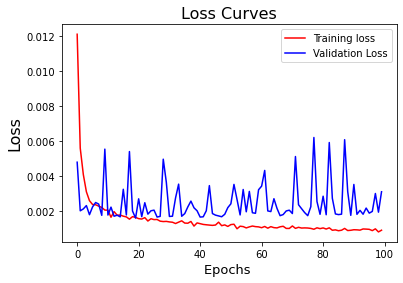

In [64]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
plt.xlabel('Epochs ',fontsize=13)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
fig1.savefig('loss_cnn.png')
plt.show()

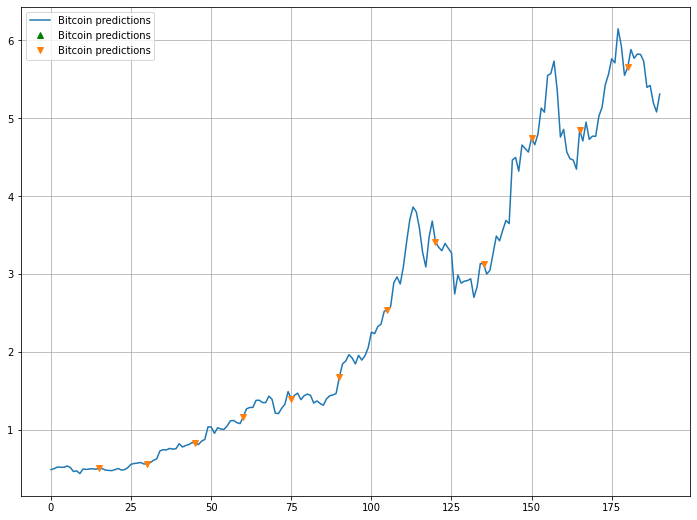

In [65]:
plt.figure(figsize=(12,9))

plt.plot(x_test, label="Bitcoin predictions")
plt.plot(list(buys.keys()),list(buys.values()),'^',color='g',label='Bitcoin predictions')
plt.plot(list(sells.keys()),list(sells.values()),'v',label='Bitcoin predictions')
plt.legend()
plt.grid(True)
         
